# Get the data and imports

In [1]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

File 'airline_passengers.csv' already there; not retrieving.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [3]:
# Check if there are any nan values
df.isna().sum()

Passengers    0
dtype: int64

<Axes: xlabel='Month'>

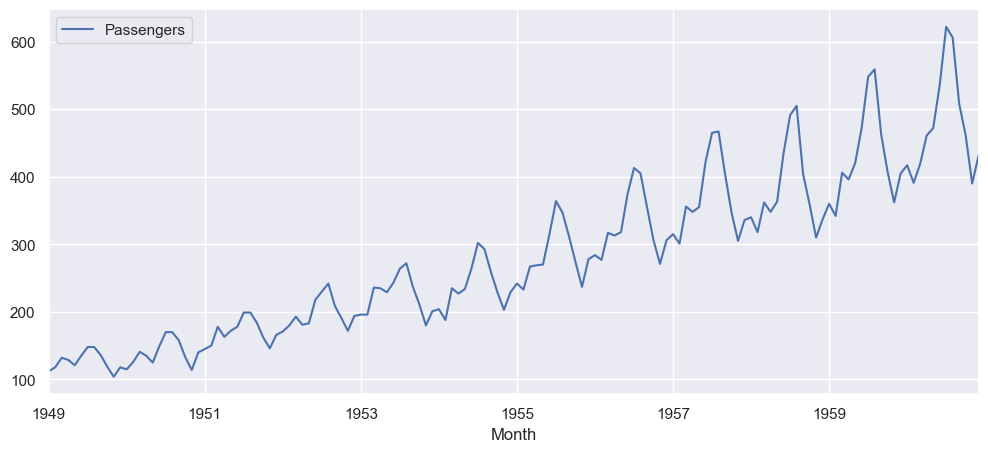

In [4]:
# Plot the data to see the trend
df.plot(figsize=(12, 5))

Can observe both a trend and a cyclcical component.

# Calculate the EWMA

<Axes: xlabel='Month'>

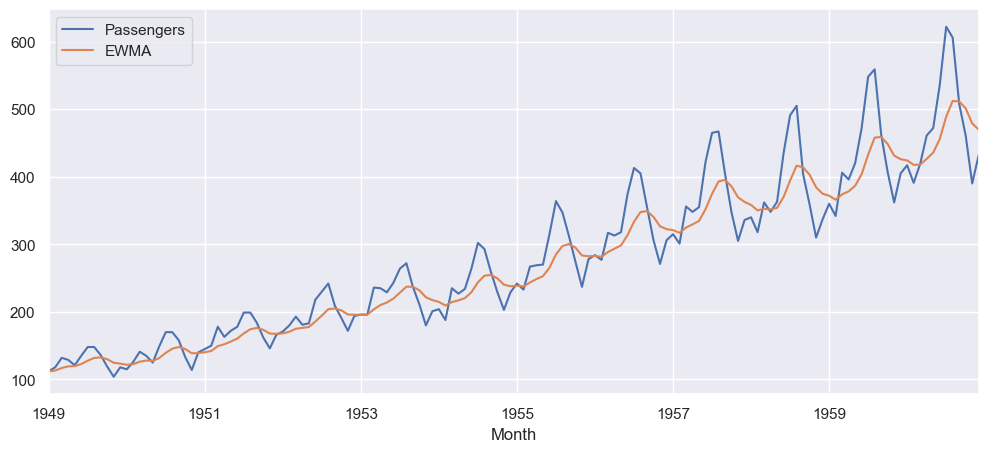

In [5]:
alpha = 0.2
df['EWMA'] = df['Passengers'].ewm(alpha=alpha, adjust=False).mean() # adjust=False means that we are using the formula for the EWMA
df.plot(figsize=(12, 5))

# Holt-Winters Model

In [6]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [10]:
# Assign frequency to the data
df.index.freq = 'MS' # MS means Monthly Start (the first day of the month) - this is the default frequency for pandas
df.head()

,Passengers,EWMA
Month,,
1949-01-01,112,112.0000
1949-02-01,118,113.2000
1949-03-01,132,116.9600
1949-04-01,129,119.3680
1949-05-01,121,119.6944


In [21]:
# Carry out a train-test split with 12 data points and forecasting 
N_test = 12
train = df.iloc[:len(df)-N_test]
test = df.iloc[len(df)-N_test:]
train_index = df.index <= train.index[-1]
test_index = df.index > train.index[-1]


## Test additive model

In [22]:
holt = ExponentialSmoothing(train['Passengers'], trend='add', seasonal='add', seasonal_periods=12)

In [23]:
results = holt.fit()

In [24]:

df.loc[train_index, 'Holt'] = results.fittedvalues
df.loc[test_index, 'Holt'] = results.forecast(N_test)

In [25]:
df.head()

,Passengers,EWMA,Holt
Month,,,
1949-01-01,112,112.0000,111.956738
1949-02-01,118,113.2000,120.147181
1949-03-01,132,116.9600,134.689236
1949-04-01,129,119.3680,131.305335
1949-05-01,121,119.6944,124.575980


<Axes: xlabel='Month'>

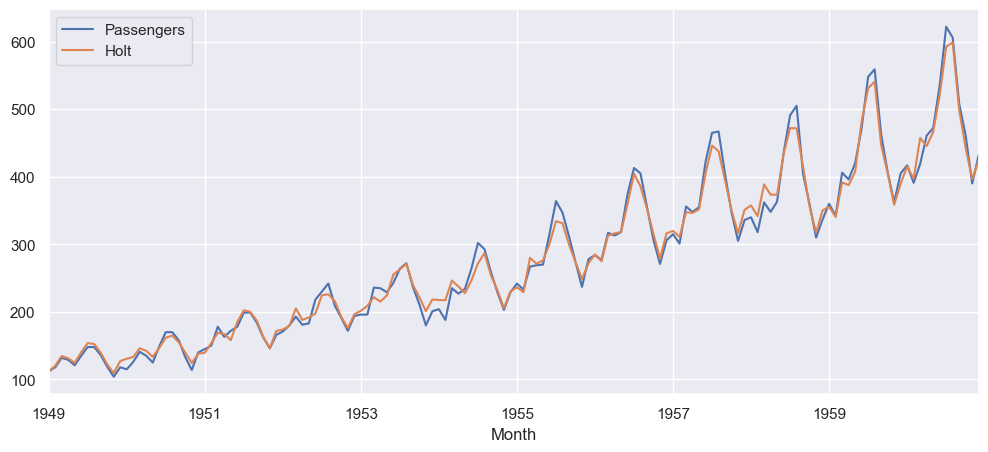

In [26]:
df[['Passengers', 'Holt']].plot(figsize=(12, 5))